In [91]:
import os
import json
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
ls ../results/muestras

kraskov_1/


In [3]:
results_folder = "../results/muestras/kraskov_1/"
gaussian_results = {}
for gaussian_i in sorted(os.listdir(results_folder)):
    gaussian_i_folder = os.path.join(results_folder, gaussian_i)
    gaussian_results[gaussian_i] = {
        "mean": [],
        "std": []
    }
    for n_data in sorted(os.listdir(gaussian_i_folder)):
        data_filepath = os.path.join(gaussian_i_folder, n_data, "results_samples.txt")
        data = np.loadtxt(data_filepath, delimiter=",")
        print(gaussian_i, n_data, data.shape, data_filepath)
        data_mean, data_std = data.mean(axis=0), data.std(axis=0)
        gaussian_results[gaussian_i]["mean"].append(data_mean)
        gaussian_results[gaussian_i]["std"].append(data_std)

gaussian_1 100 (100, 3) ../results/muestras/kraskov_1/gaussian_1/100/results_samples.txt
gaussian_1 1000 (100, 3) ../results/muestras/kraskov_1/gaussian_1/1000/results_samples.txt
gaussian_1 10000 (100, 3) ../results/muestras/kraskov_1/gaussian_1/10000/results_samples.txt
gaussian_1 100000 (100, 3) ../results/muestras/kraskov_1/gaussian_1/100000/results_samples.txt
gaussian_2 100 (100, 3) ../results/muestras/kraskov_1/gaussian_2/100/results_samples.txt
gaussian_2 1000 (100, 3) ../results/muestras/kraskov_1/gaussian_2/1000/results_samples.txt
gaussian_2 10000 (100, 3) ../results/muestras/kraskov_1/gaussian_2/10000/results_samples.txt
gaussian_2 100000 (100, 3) ../results/muestras/kraskov_1/gaussian_2/100000/results_samples.txt
gaussian_3 100 (100, 3) ../results/muestras/kraskov_1/gaussian_3/100/results_samples.txt
gaussian_3 1000 (100, 3) ../results/muestras/kraskov_1/gaussian_3/1000/results_samples.txt
gaussian_3 10000 (100, 3) ../results/muestras/kraskov_1/gaussian_3/10000/results_sam

In [92]:
with open("../data/muestras/index.json", "r") as f:
    index = json.load(f)

In [93]:
index

{'gaussian_1': {'cov': [[0.9486545337793236,
    0.8898027211921073,
    0.6100372359467587],
   [0.8898027211921073, 0.8713281325959036, 0.5399206528673799],
   [0.6100372359467587, 0.5399206528673799, 0.4206449508316386]],
  'TC': 14.942948002189445,
  'DTC': 24.511912843159863,
  'O': -9.568964840970418},
 'gaussian_2': {'cov': [[1.7820428291000843,
    2.0761737700739205,
    1.8630084127252586],
   [2.0761737700739205, 2.45134450246227, 2.20499211418001],
   [1.8630084127252586, 2.20499211418001, 2.0013729474860438]],
  'TC': 6.553575100639645,
  'DTC': 3.9794005557070142,
  'O': 2.574174544932631},
 'gaussian_3': {'cov': [[1.4047522276240016,
    0.7133489283801965,
    1.3754991844892672],
   [0.7133489283801965, 1.1990381936177523, 1.2639095070810848],
   [1.3754991844892672, 1.2639095070810848, 1.889215123159583]],
  'TC': 2.0388871614132027,
  'DTC': 2.0369566995937323,
  'O': 0.0019304618194704304},
 'gaussian_4': {'cov': [[1.8721259123011116,
    0.9251691704478602,
    1.2

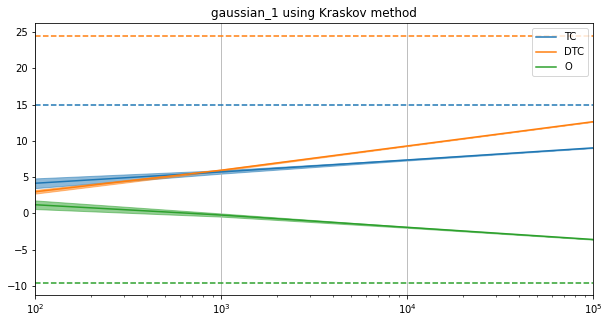

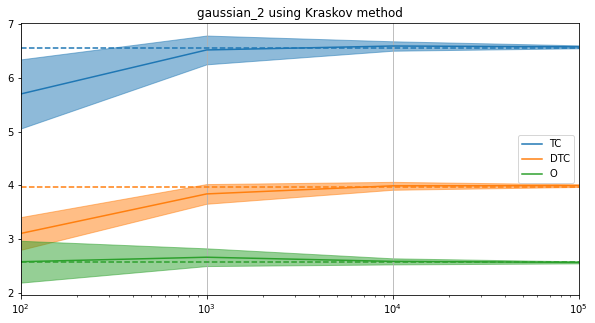

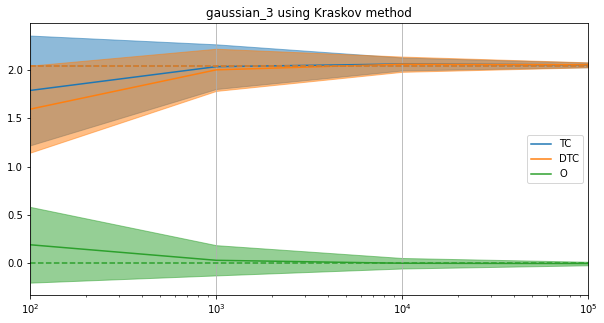

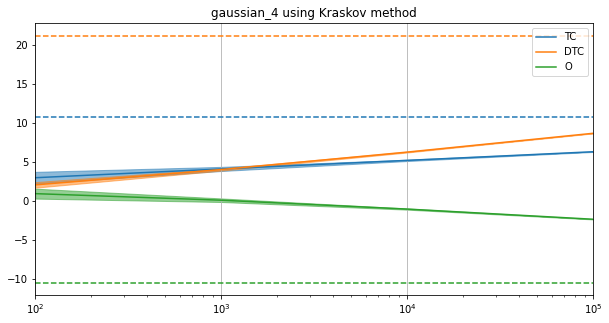

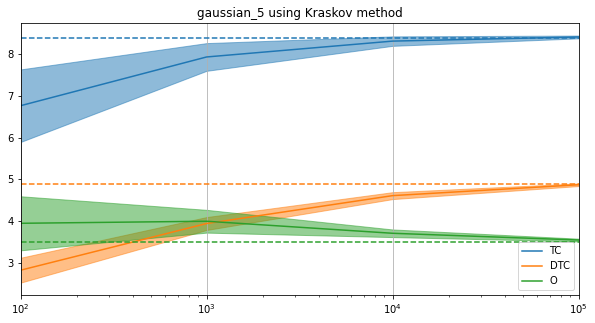

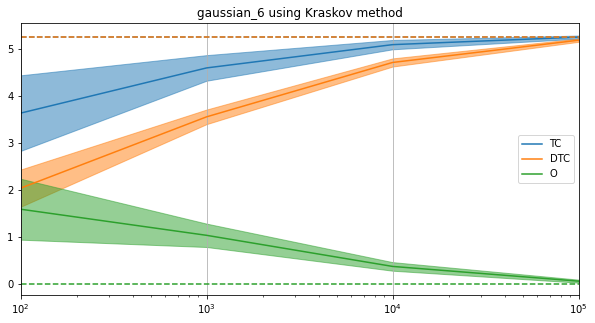

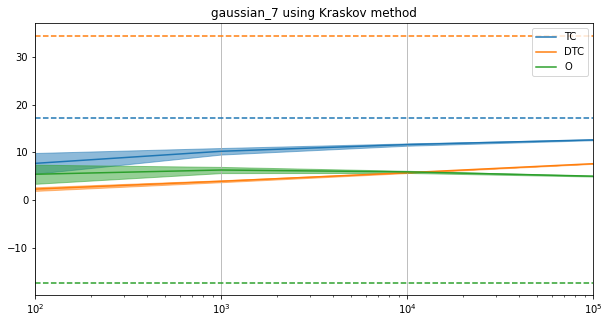

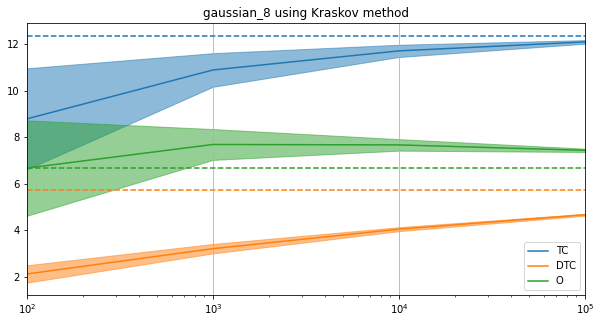

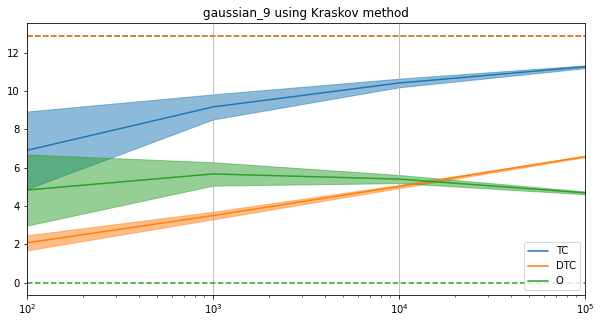

In [136]:
metrics_plot = ["TC", "DTC", "O"]
for gaussian_i in sorted(os.listdir(results_folder)):
    try:
        fig, ax = plt.subplots(figsize=(10,5))
        mean = pd.DataFrame(gaussian_results[gaussian_i]["mean"], columns=["TC", "DTC", "O"], index=[100, 1000, 10000, 100000])
        std = pd.DataFrame(gaussian_results[gaussian_i]["std"], columns=["TC", "DTC", "O"], index=[100, 1000, 10000, 100000])
        mean[metrics_plot].plot(ax=ax)
        for i, metric_plot in enumerate(metrics_plot):
            ax.fill_between(mean.index, mean[metric_plot]-3*std[metric_plot], mean[metric_plot]+3*std[metric_plot], color=f"C{i}", alpha=0.5)
            ax.axhline(y=index[gaussian_i][metric_plot], color=f'C{i}', linestyle='--')
        plt.title(f"{gaussian_i} using Kraskov method")
        ax.set_xscale('log')
        plt.xlim(10**2, 10**5)
        plt.grid(axis="x")
        #fig.savefig(f"../results/plots/{metrics_plot}_{gaussian_i}.png")
    except:
        pass

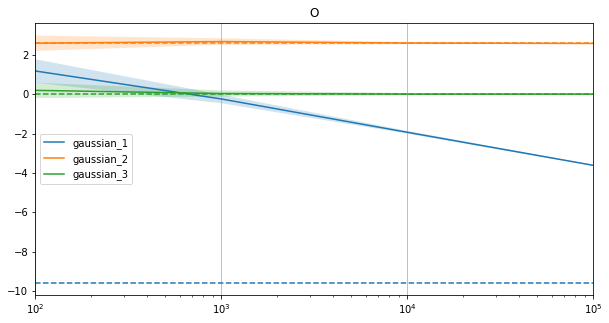

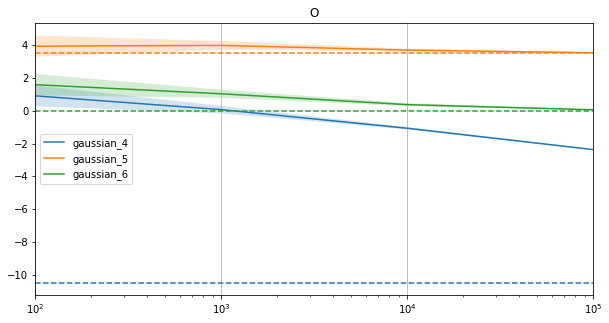

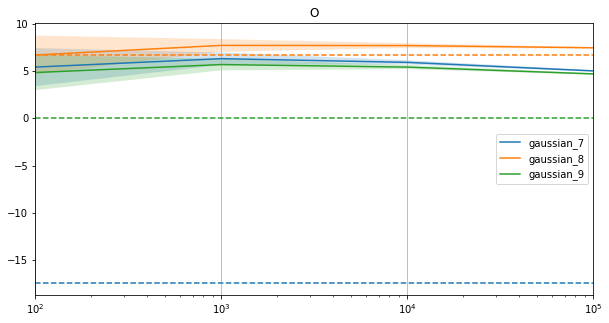

In [148]:
metric_plot = "O"
i = 0
for gaussian_i in sorted(os.listdir(results_folder)):
    if i % 3 == 0:
        i = 0
        fig, ax = plt.subplots(figsize=(10,5))
    mean = pd.DataFrame(gaussian_results[gaussian_i]["mean"], columns=["TC", "DTC", "O"], index=[100, 1000, 10000, 100000])
    std = pd.DataFrame(gaussian_results[gaussian_i]["std"], columns=["TC", "DTC", "O"], index=[100, 1000, 10000, 100000])
    mean = mean.rename(columns={metric_plot: gaussian_i})
    mean[[gaussian_i]].plot(ax=ax)
    ax.fill_between(mean.index, mean[gaussian_i]-3*std[metric_plot], mean[gaussian_i]+3*std[metric_plot], alpha=0.2)
    ax.axhline(y=index[gaussian_i][metric_plot], color=f"C{i}", linestyle='--')
    ax.set_xscale('log')
    ax.set_title(metric_plot)
    plt.xlim(10**2, 10**5)
    plt.grid(axis="x")
    i += 1

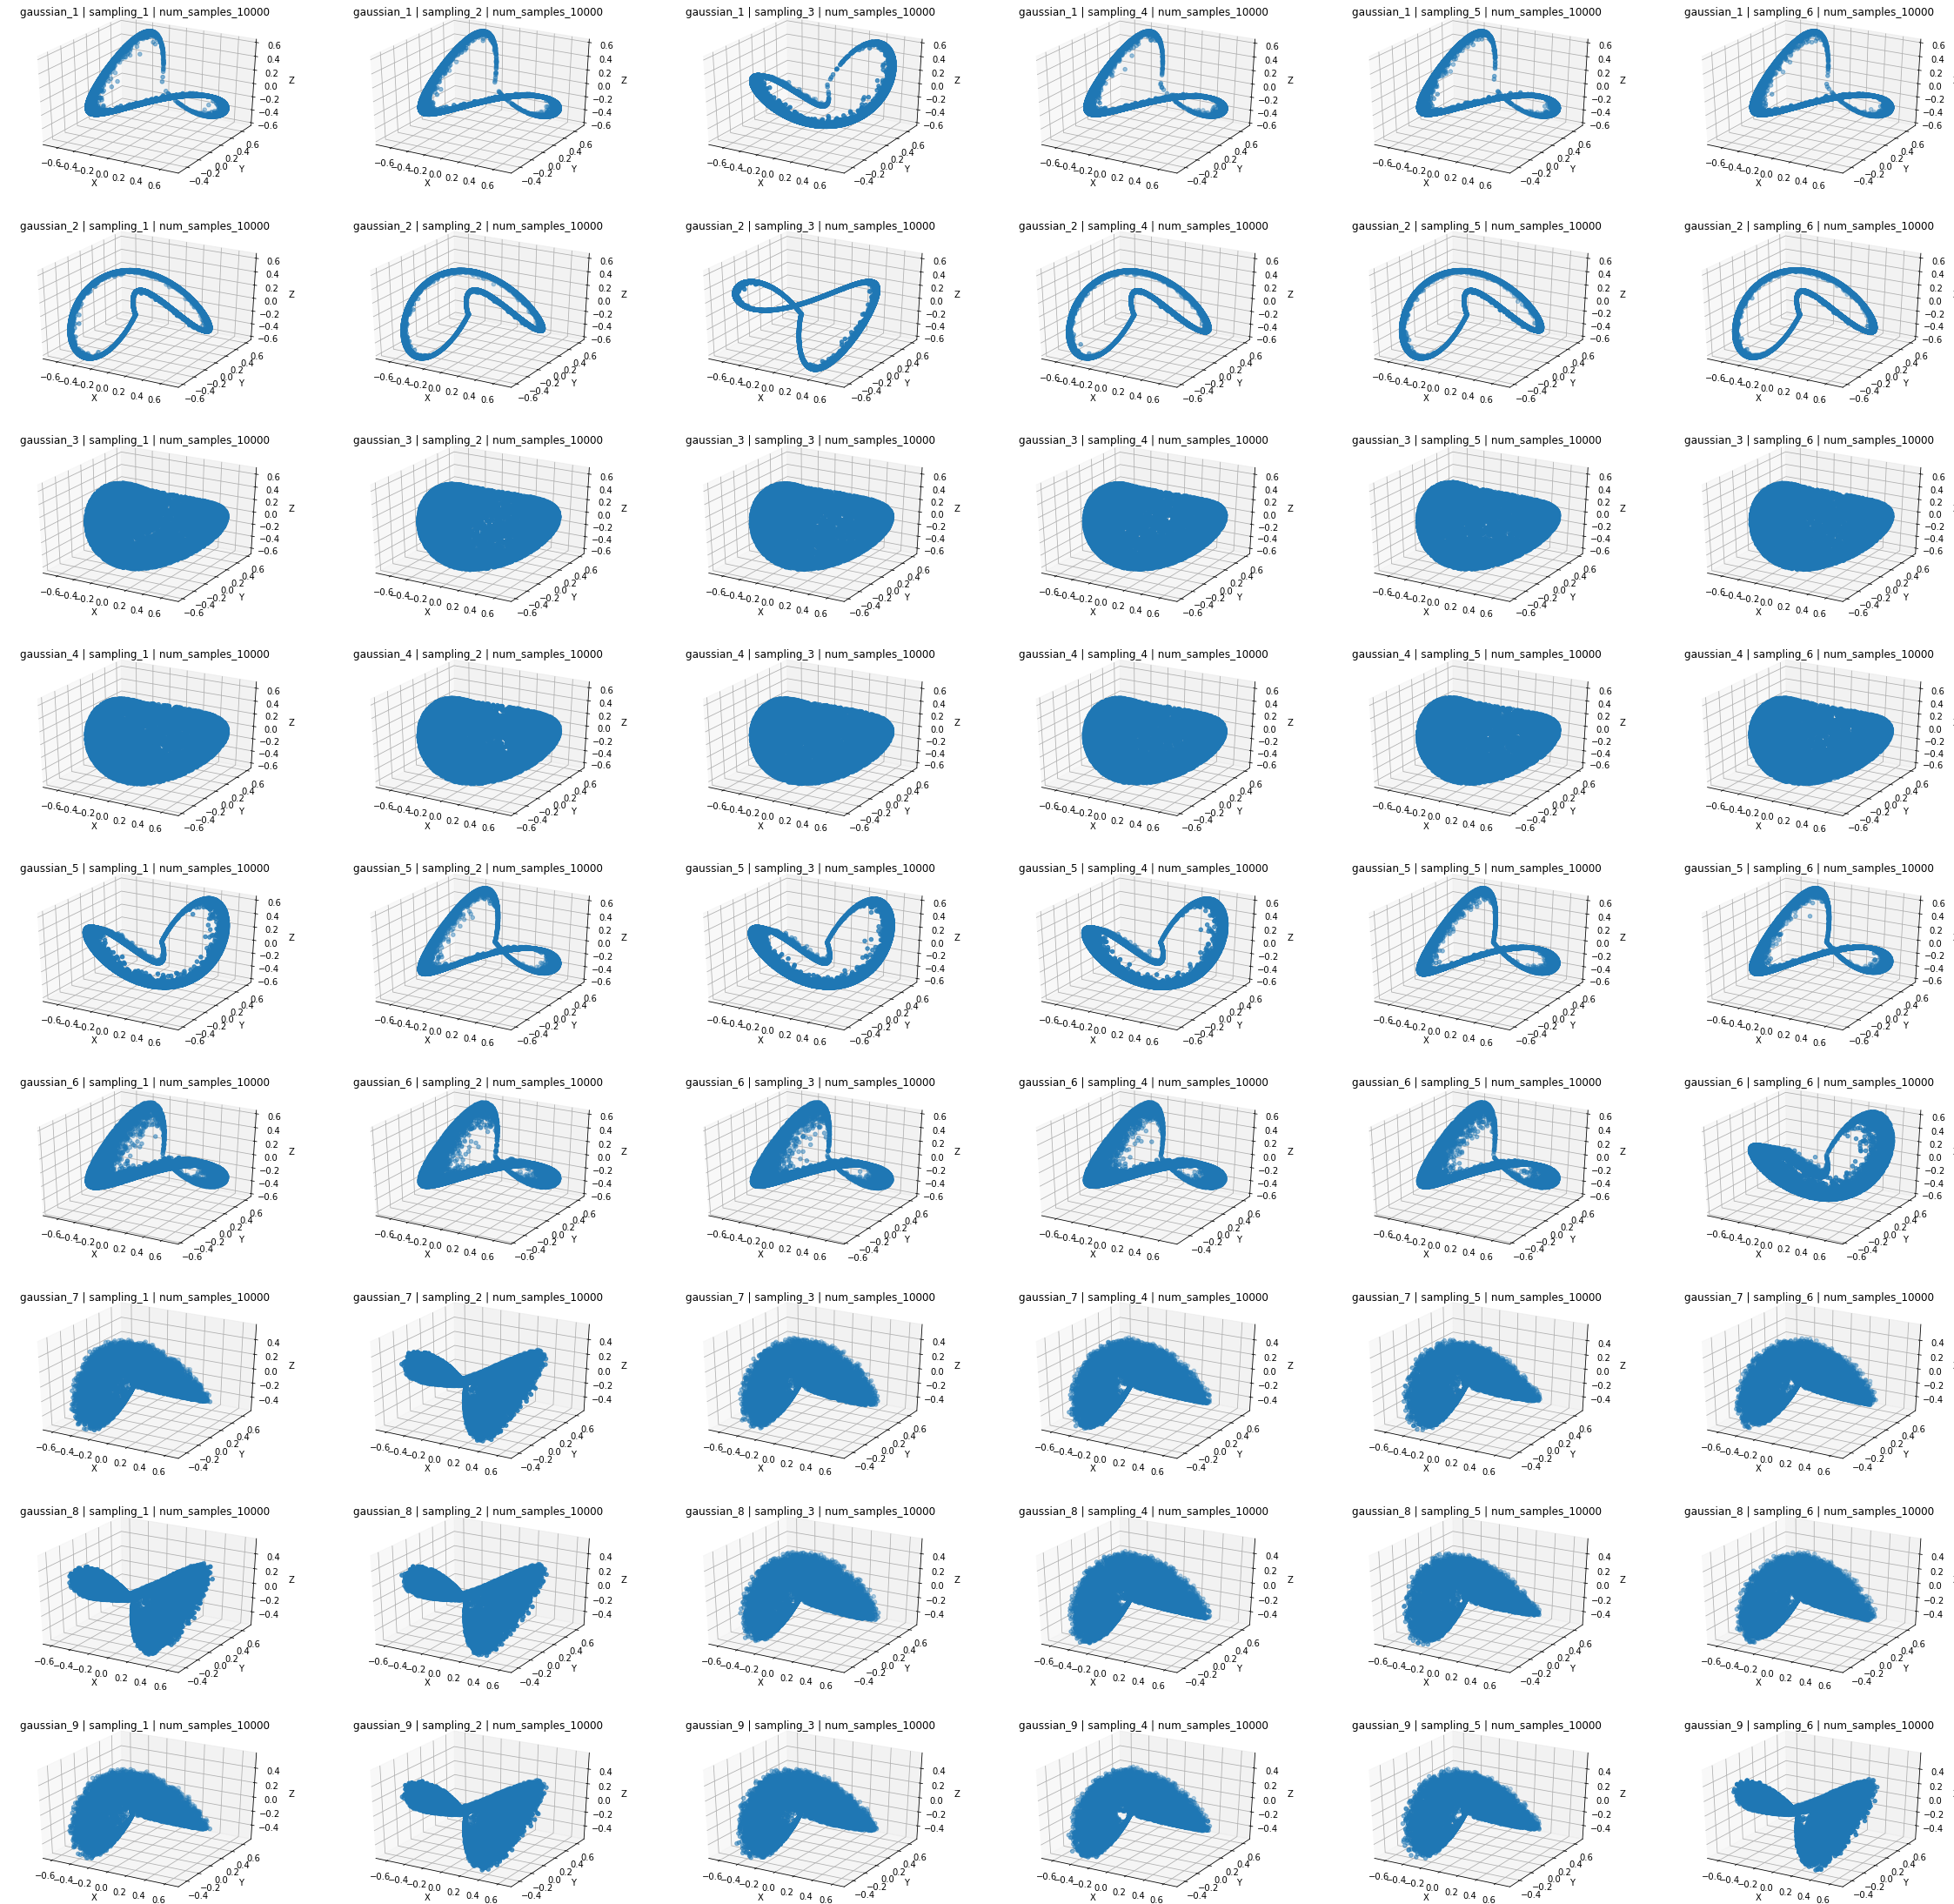

In [127]:
from sklearn.decomposition import KernelPCA

n_samples = 10000
N_i = 10
N_j = 7

fig = plt.figure(figsize=(40,40))
k = 1
for i in range(1, N_i):
    for j in range(1, N_j):
        ax = fig.add_subplot(N_i-1, N_j-1, k, projection='3d')
        samples = np.loadtxt(f"../data/muestras/gaussian_{i}/samples{j}.txt", comments="%")
        samples = samples[:n_samples]
        transformer = KernelPCA(n_components=3, kernel='rbf')
        samples_transformed = transformer.fit_transform(samples)

        xs = samples_transformed[:,0]
        ys = samples_transformed[:,1]
        zs = samples_transformed[:,2]
        ax.scatter(xs, ys, zs, label=f"samples{j}")
        ax.set_xlabel('X')
        ax.set_ylabel('Y')
        ax.set_zlabel('Z')
        ax.set_title(f"gaussian_{i} | sampling_{j} | num_samples_{n_samples}")
        k+=1